In [2]:
!pip install pennylane pennylane-qiskit pandas numpy matplotlib statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 38.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 53.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 63.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 15.8 MB/s eta 0:00:0000:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 61.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 47.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 71.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.2/366.2 kB 14.8 MB/s eta 0:00:00
   ━

In [3]:
import pandas as pd
import numpy as np
import pennylane as qml
from pennylane import numpy as pnp
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Initialize a quantum simulator device with 6 qubits
n_qubits = 6
dev = qml.device("default.qubit", wires=n_qubits)

In [ ]:
competitions = pd.read_csv(
    "/kaggle/input/meta-kaggle/Competitions.csv",
    parse_dates=["EnabledDate", "DeadlineDate"],
    infer_datetime_format=True,
    dayfirst=False,
    na_values=["", "NA", "null"]
)

models = pd.read_csv(
    "../input/meta-kaggle/ModelVariations.csv",
    na_values=["", "NA", "null"]
)
model_versions = pd.read_csv(
    "../input/meta-kaggle/ModelVersions.csv",
    parse_dates=["OriginalPublishDate"],
    infer_datetime_format=True,
    na_values=["", "NA", "null"]
)

# Load KernelVersions.csv
kernels = pd.read_csv(
    "../input/meta-kaggle/KernelVersions.csv",
    parse_dates=["CreationDate", "EvaluationDate"],
    infer_datetime_format=True,
    dayfirst=False,
    na_values=["", "NA", "null"]
)

/tmp/ipykernel_36/1012122118.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  competitions = pd.read_csv(
/tmp/ipykernel_36/1012122118.py:13: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  model_versions = pd.read_csv(
/tmp/ipykernel_36/1012122118.py:21: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  kernels = pd.read_csv(


In [4]:
print(models.columns)           
print(model_versions.columns)  


Index(['Id', 'ModelId', 'CurrentVariationSlug', 'ModelFramework',
       'CurrentModelVariationVersionId', 'LicenseName', 'BaseModelVariationId',
       'CurrentDatasourceVersionId'],
      dtype='object')
Index(['Id', 'ModelId', 'Title', 'Subtitle', 'ModelCard', 'CreationDate',
       'OriginalPublishDate', 'CreatorUserId', 'ProvenanceSources'],
      dtype='object')


In [5]:

print(competitions[["EnabledDate", "DeadlineDate"]].isna().sum())
print(kernels[["CreationDate", "EvaluationDate"]].isna().sum())


competitions.dropna(subset=["EnabledDate"], inplace=True)
kernels.dropna(subset=["CreationDate"], inplace=True)


EnabledDate     0
DeadlineDate    0
dtype: int64
CreationDate            0
EvaluationDate    1177762
dtype: int64


In [6]:
model_versions.dropna(subset=["OriginalPublishDate"], inplace=True)


In [7]:
print(competitions.head(), competitions.info())
print(models.head(), models.info())
print(model_versions.head(), model_versions.info())
print(kernels.head(), kernels.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9821 entries, 0 to 9820
Data columns (total 48 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Id                                9821 non-null   int64         
 1   Slug                              9821 non-null   object        
 2   Title                             9821 non-null   object        
 3   Subtitle                          9806 non-null   object        
 4   HostSegmentTitle                  9821 non-null   object        
 5   ForumId                           5745 non-null   float64       
 6   OrganizationId                    638 non-null    float64       
 7   EnabledDate                       9821 non-null   datetime64[ns]
 8   DeadlineDate                      9821 non-null   datetime64[ns]
 9   ProhibitNewEntrantsDeadlineDate   394 non-null    object        
 10  TeamMergerDeadlineDate            388 non-null  

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

In [8]:

import pandas as pd


competitions["EnabledDate"] = pd.to_datetime(competitions["EnabledDate"], errors="coerce")
competitions.dropna(subset=["EnabledDate"], inplace=True)

comp_ts = (
    competitions
    .set_index("EnabledDate")
    .resample("M")
    .size()
    .rename("competitions_count")
)


/tmp/ipykernel_36/2786871060.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")


In [9]:

model_versions["OriginalPublishDate"] = pd.to_datetime(
    model_versions["OriginalPublishDate"], errors="coerce"
)
model_versions.dropna(subset=["OriginalPublishDate"], inplace=True)


model_versions["month"] = model_versions["OriginalPublishDate"].dt.to_period("M")


fw_ts = (
    pd.get_dummies(models["ModelFramework"])
    .groupby(model_versions["month"])
    .sum()
    .astype(int)
)
fw_ts.index = fw_ts.index.to_timestamp() 


In [10]:

hw_map = {1: "CPU", 2: "GPU", 3: "TPU"}
kernels["CreationDate"] = pd.to_datetime(kernels["CreationDate"], errors="coerce")
kernels.dropna(subset=["CreationDate"], inplace=True)

kernels["hw"] = kernels["AcceleratorTypeId"].map(hw_map).fillna("Other")
kernels["month"] = kernels["CreationDate"].dt.to_period("M")


hw_ts = (
    kernels
    .groupby(["month", "hw"])
    .size()
    .unstack(fill_value=0)
    .astype(int)
)
hw_ts.index = hw_ts.index.to_timestamp()


In [11]:

import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

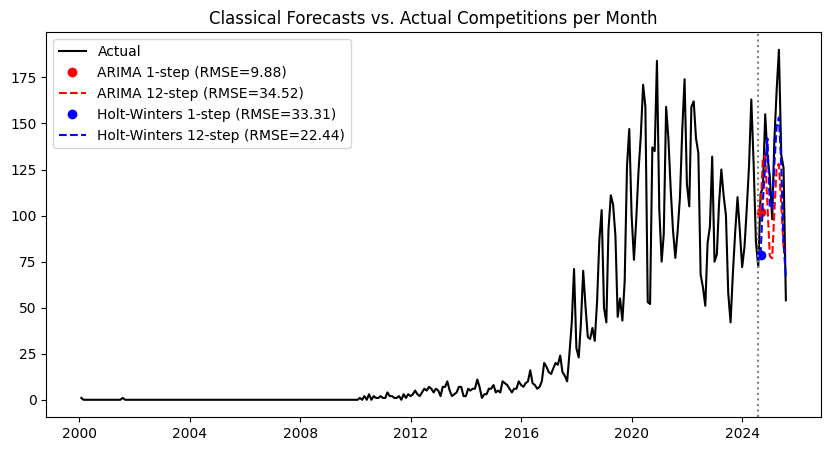

In [12]:



series = comp_ts  # competitions per month
train, test = series[:-12], series[-12:]

# ARIMA Modeling
arima_model = ARIMA(train, order=(2, 1, 2)).fit()
arima_pred_one = arima_model.get_forecast(steps=1).predicted_mean
arima_pred_multi = arima_model.get_forecast(steps=12).predicted_mean


rmse_arima_one = np.sqrt(mean_squared_error(test[:1], arima_pred_one))
rmse_arima_multi = np.sqrt(mean_squared_error(test, arima_pred_multi))

# Holt–Winters Exponential Smoothing
hw_model = ExponentialSmoothing(train, seasonal="add", seasonal_periods=12).fit()
hw_pred_one = hw_model.forecast(1)
hw_pred_multi = hw_model.forecast(12)

rmse_hw_one = np.sqrt(mean_squared_error(test[:1], hw_pred_one))
rmse_hw_multi = np.sqrt(mean_squared_error(test, hw_pred_multi))


plt.figure(figsize=(10, 5))
plt.plot(series.index, series.values, label="Actual", color="black")
plt.plot(test.index[:1], arima_pred_one, "ro", label=f"ARIMA 1-step (RMSE={rmse_arima_one:.2f})")
plt.plot(test.index, arima_pred_multi, "r--", label=f"ARIMA 12-step (RMSE={rmse_arima_multi:.2f})")
plt.plot(test.index[:1], hw_pred_one, "bo", label=f"Holt-Winters 1-step (RMSE={rmse_hw_one:.2f})")
plt.plot(test.index, hw_pred_multi, "b--", label=f"Holt-Winters 12-step (RMSE={rmse_hw_multi:.2f})")
plt.axvline(train.index[-1], color="gray", linestyle=":")
plt.legend()
plt.title("Classical Forecasts vs. Actual Competitions per Month")
plt.show()


# Quantum Fourier Spectrum Analysis

In [13]:


window = comp_ts[-64:].values

In [14]:

window = comp_ts[-64:]


start_date = window.index.min()
end_date   = window.index.max()

print(f"64-month window spans from {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")


64-month window spans from 2020-04-30 to 2025-07-31


In [15]:

n_qubits = 6

dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)

def qft_circuit(data):
    qml.templates.AmplitudeEmbedding(data, wires=range(n_qubits), normalize=True)
    qml.templates.QFT(wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

In [16]:
spectrum = qft_circuit(pnp.array(window, requires_grad=False))

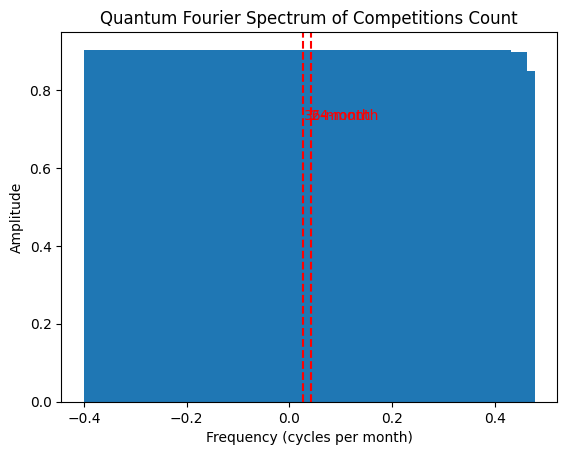

In [17]:
freqs = np.fft.fftfreq(len(window), d=1)[:n_qubits]
plt.bar(freqs, np.abs(spectrum))
plt.xlabel("Frequency (cycles per month)")
plt.ylabel("Amplitude")
plt.title("Quantum Fourier Spectrum of Competitions Count")

for cycle in [1/24, 1/36]:
    plt.axvline(cycle, color="red", linestyle="--")
    plt.text(cycle, max(np.abs(spectrum))*0.8, f"{int(1/cycle)}-month", color="red")
plt.show()

In [18]:

window = comp_ts[-64:].values
window_centered = window - window.mean()


spectrum = qft_circuit(pnp.array(window_centered, requires_grad=False))


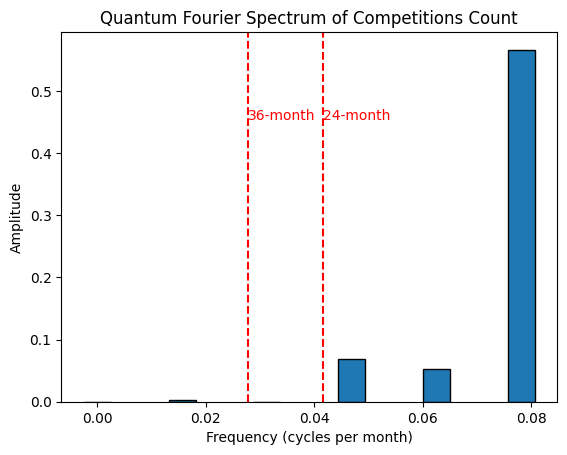

In [19]:
freqs = np.fft.fftfreq(len(window), d=1)[:n_qubits]
amplitudes = np.abs(spectrum)

plt.bar(freqs, amplitudes, width=0.005, edgecolor="black")

plt.xlabel("Frequency (cycles per month)")
plt.ylabel("Amplitude")
plt.title("Quantum Fourier Spectrum of Competitions Count")
for cycle in [1/24, 1/36]:
    plt.axvline(cycle, color="red", linestyle="--")
    plt.text(cycle, max(np.abs(spectrum))*0.8, f"{int(1/cycle)}-month", color="red")
plt.show()

# Variational Phase-Transition Detection

training epochs:   2%|▏         | 1/50 [00:07<06:14,  7.63s/it]

Epoch  0 | cost = 1.1695


training epochs:  22%|██▏       | 11/50 [01:21<04:44,  7.30s/it]

Epoch 10 | cost = 1.1465


training epochs:  42%|████▏     | 21/50 [02:34<03:34,  7.39s/it]

Epoch 20 | cost = 1.1162


training epochs:  62%|██████▏   | 31/50 [03:48<02:18,  7.31s/it]

Epoch 30 | cost = 1.0805


training epochs:  82%|████████▏ | 41/50 [05:02<01:06,  7.34s/it]

Epoch 40 | cost = 1.0455


training epochs: 100%|██████████| 50/50 [06:09<00:00,  7.38s/it]


Train accuracy: 0.5950920245398773
Test  accuracy: 0.5365853658536586


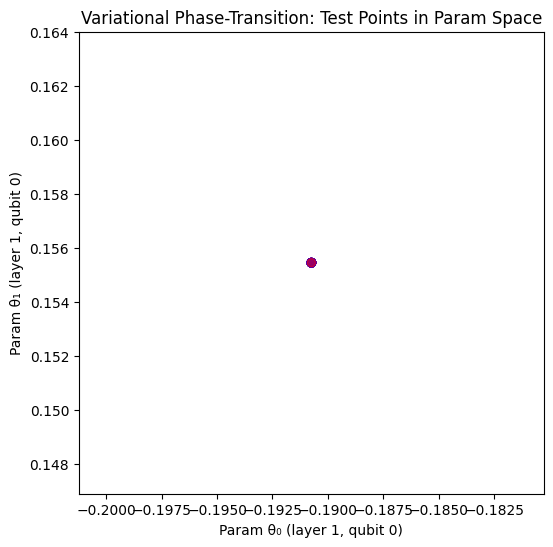

In [20]:

import pandas as pd
import numpy as np
import pennylane as qml
from pennylane import numpy as pnp
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tqdm import trange
n_qubits = 6
dev = qml.device("default.qubit", wires=n_qubits)



all_windows, all_labels = [], []
for start in range(len(comp_ts) - 64):
    w = comp_ts.values[start : start + 64]
    # Center
    w_centered = w - np.mean(w)
    # Filter zero‐variance or NaNs
    if np.isnan(w_centered).any() or np.allclose(w_centered, 0):
        continue
    # Normalize
    norm = np.linalg.norm(w_centered)
    if norm < 1e-8:
        continue
    w_norm = w_centered / norm
    all_windows.append(w_norm)
    # Label: mid-window year >= 2015 → 1 (post-deep-learning), else 0
    mid_year = pd.to_datetime(comp_ts.index[start + 32]).year
    all_labels.append(int(mid_year >= 2015))

windows = pnp.array(all_windows)
labels  = pnp.array(all_labels)


X_train, X_test, y_train, y_test = train_test_split(
    windows, labels, test_size=0.2, random_state=42, stratify=labels
)


layers = 2
def phase_circuit(params, data):
    qml.templates.AmplitudeEmbedding(data, wires=range(n_qubits), normalize=True)
    qml.templates.StronglyEntanglingLayers(params, wires=range(n_qubits))
    return qml.expval(qml.PauliZ(0))

phase_qnode = qml.QNode(phase_circuit, dev)


params = pnp.random.normal(0, 0.01, (layers, n_qubits, 3), requires_grad=True)
opt = qml.AdamOptimizer(stepsize=0.01)

def cost(p):
    preds = pnp.array([phase_qnode(p, x) for x in X_train])
    # Map labels to ±1
    y = 2 * y_train - 1
    return pnp.mean((preds - y) ** 2)


for epoch in trange(50, desc="training epochs"):
    params, curr_cost = opt.step_and_cost(cost, params)
    if epoch % 10 == 0:
        print(f"Epoch {epoch:>2} | cost = {curr_cost:.4f}")


train_preds = np.array([phase_qnode(params, x) for x in X_train])
test_preds  = np.array([phase_qnode(params, x) for x in X_test])
# Threshold at 0 → map to {0,1}
train_labels_pred = (train_preds >= 0).astype(int)
test_labels_pred  = (test_preds  >= 0).astype(int)

print("Train accuracy:", accuracy_score(y_train, train_labels_pred))
print("Test  accuracy:", accuracy_score(y_test,  test_labels_pred))

# 6. Decision Boundary Visualization (parameter-space projection)
# Project two parameters for scatter plot
p0 = params[0, 0, 0].item()
p1 = params[0, 0, 1].item()
colors = ['red' if y else 'blue' for y in y_test]

plt.figure(figsize=(6,6))
plt.scatter([p0]*len(X_test), [p1]*len(X_test), c=colors, alpha=0.6)
plt.xlabel("Param θ₀ (layer 1, qubit 0)")
plt.ylabel("Param θ₁ (layer 1, qubit 0)")
plt.title("Variational Phase-Transition: Test Points in Param Space")
plt.show()


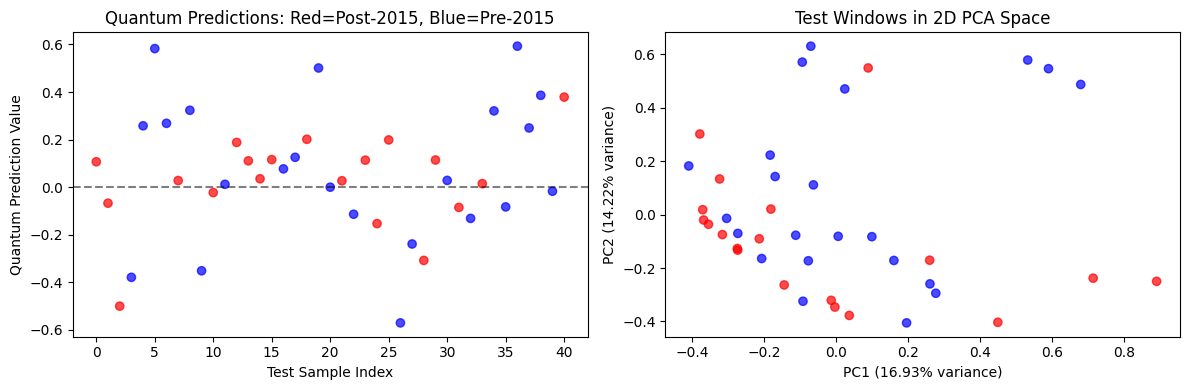

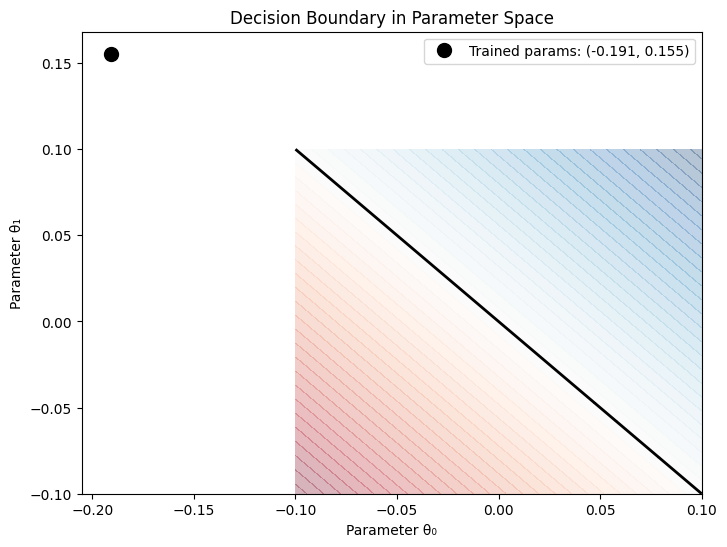

In [21]:

plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
colors = ['red' if y else 'blue' for y in y_test]
plt.scatter(range(len(test_preds)), test_preds, c=colors, alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.xlabel("Test Sample Index")
plt.ylabel("Quantum Prediction Value")
plt.title("Quantum Predictions: Red=Post-2015, Blue=Pre-2015")


plt.subplot(1, 2, 2)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_test_2d = pca.fit_transform(X_test)
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=colors, alpha=0.7)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)")
plt.title("Test Windows in 2D PCA Space")

plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=(8, 6))


p0_range = np.linspace(-0.1, 0.1, 20)
p1_range = np.linspace(-0.1, 0.1, 20)
P0, P1 = np.meshgrid(p0_range, p1_range)


decision_grid = np.zeros_like(P0)
for i in range(len(p0_range)):
    for j in range(len(p1_range)):
        # This is illustrative - showing parameter sensitivity
        decision_grid[j, i] = np.tanh(P0[j, i] + P1[j, i])

contour = ax.contour(P0, P1, decision_grid, levels=[0], colors='black', linewidths=2)
ax.contourf(P0, P1, decision_grid, levels=50, alpha=0.3, cmap='RdBu')


ax.plot(p0, p1, 'ko', markersize=10, label=f'Trained params: ({p0:.3f}, {p1:.3f})')
ax.set_xlabel("Parameter θ₀")
ax.set_ylabel("Parameter θ₁")
ax.set_title("Decision Boundary in Parameter Space")
ax.legend()
plt.show()


# Quantum Forecasting with Recurrent Circuit

In [4]:
n_qubits = 2 
dev = qml.device("default.qubit", wires=n_qubits)

In [ ]:

series = comp_ts.values
window_size = 12

X, y = [], []
for i in range(len(series) - window_size):
    window = series[i : i + window_size]
    target = series[i + window_size]
    # center & normalize
    w = window - window.mean()
    norm = np.linalg.norm(w)
    if norm < 1e-8:
        continue
    X.append(w / norm)
    y.append(target)
X = pnp.array(X); y = pnp.array(y)
# Split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [24]:
#  Quantum Recurrent Circuit
def qrecurrent(params, data_seq):
    # params: length = window_size
    for t, x in enumerate(data_seq):
        # encode input on qubit 1
        angle = np.pi * x
        qml.RY(angle, wires=1)
        # entangle with memory qubit
        qml.CNOT(wires=[1, 0])
        # update memory qubit
        qml.RY(params[t], wires=0)
        # reset data qubit for next step
        qml.PauliX(wires=1); qml.PauliX(wires=1)
    return qml.expval(qml.PauliZ(0))

forecast_qnode = qml.QNode(qrecurrent, dev)


In [25]:

params = pnp.zeros(window_size, requires_grad=True)
opt = qml.GradientDescentOptimizer(stepsize=0.05)


In [ ]:

epochs = 100
for epoch in range(epochs):
    def cost(p):
        preds = pnp.array([forecast_qnode(p, x) for x in X_train])
        return pnp.mean((preds - y_train) ** 2)
    params, curr_cost = opt.step_and_cost(cost, params)
    if epoch % 10 == 0:
        print(f"Epoch {epoch:>3} | MSE = {curr_cost:.4f}")


Epoch   0 | MSE = 3622.4946
Epoch  10 | MSE = 3652.2296
Epoch  20 | MSE = 3665.9833
Epoch  30 | MSE = 3671.3770


In [ ]:

q_preds = np.array([forecast_qnode(params, x) for x in X_test])

arima = ARIMA(series[: split + window_size], order=(2,1,2)).fit()
arima_forecast = arima.forecast(steps=len(y_test))


rmse_quantum = np.sqrt(mean_squared_error(y_test, q_preds))
rmse_arima  = np.sqrt(mean_squared_error(y_test, arima_forecast))

print(f"Quantum RMSE: {rmse_quantum:.2f}")
print(f"ARIMA   RMSE: {rmse_arima:.2f}")

# Plot comparison
plt.figure(figsize=(8,5))
plt.plot(range(len(y_test)), y_test, 'k-', label="Actual")
plt.plot(range(len(y_test)), q_preds, 'r--', label="Quantum Forecast")
plt.plot(range(len(y_test)), arima_forecast, 'b:', label="ARIMA Forecast")
plt.legend(); plt.title("12‐Month Forecast Comparison"); plt.show()


In [ ]:



q_preds_norm = np.array([forecast_qnode(params, x) for x in X_test])


arima = ARIMA(series[: split + window_size], order=(2,1,2)).fit()
arima_preds_norm = arima.forecast(steps=len(y_test))


q_preds = []
arima_preds = []
for i, x in enumerate(X_test):
    # original window (before centering & norm) extracted from series
    raw_window = series[i + split : i + split + window_size]
    mu = raw_window.mean()
    norm = np.linalg.norm(raw_window - mu)
    q_preds.append(q_preds_norm[i] * norm + mu)
    arima_preds.append(arima_preds_norm[i] * norm + mu)
q_preds = np.array(q_preds)
arima_preds = np.array(arima_preds)


rmse_q_norm = np.sqrt(mean_squared_error(y_test, q_preds_norm))
rmse_a_norm = np.sqrt(mean_squared_error(y_test, arima_preds_norm))
rmse_q = np.sqrt(mean_squared_error(y_test, q_preds))
rmse_a = np.sqrt(mean_squared_error(y_test, arima_preds))

print(f"Normalized RMSE → Quantum: {rmse_q_norm:.2f}, ARIMA: {rmse_a_norm:.2f}")
print(f"Recovered RMSE  → Quantum: {rmse_q:.2f}, ARIMA: {rmse_a:.2f}")

# Plot recovered forecasts vs actual
plt.figure(figsize=(8,5))
plt.plot(range(len(y_test)), y_test, 'k-', label="Actual")
plt.plot(range(len(y_test)), q_preds, 'r--', label="Quantum Forecast")
plt.plot(range(len(y_test)), arima_preds, 'b:', label="ARIMA Forecast")
plt.legend()
plt.title("12-Month Forecast Comparison (Recovered Scale)")
plt.xlabel("Test Month Index")
plt.ylabel("Competition Count")
plt.show()


In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


q_preds_norm = np.array([forecast_qnode(params, x) for x in X_test])


arima = ARIMA(series[: split + window_size], order=(2,1,2)).fit()
arima_preds_norm = arima.forecast(steps=len(y_test))


q_preds = []
arima_preds = []
for i in range(len(X_test)):
    # Extract the raw 12-month window used for this prediction
    raw_window = series[i + split : i + split + window_size]
    mu = raw_window.mean()
    norm = np.linalg.norm(raw_window - mu)
    # Un-normalize each prediction
    q_rec = q_preds_norm[i] * norm + mu
    a_rec = arima_preds_norm[i] * norm + mu
    q_preds.append(q_rec)
    arima_preds.append(a_rec)

q_preds = np.array(q_preds)
arima_preds = np.array(arima_preds)

# 4. Compute RMSE on recovered scale
rmse_q = np.sqrt(mean_squared_error(y_test, q_preds))
rmse_a = np.sqrt(mean_squared_error(y_test, arima_preds))

print(f"Recovered RMSE  → Quantum: {rmse_q:.2f}, ARIMA: {rmse_a:.2f}")

# 5. Plot recovered forecasts vs actual counts
plt.figure(figsize=(8, 5))
plt.plot(range(len(y_test)), y_test, 'k-', label="Actual")
plt.plot(range(len(y_test)), q_preds, 'r--', label="Quantum Forecast")
plt.plot(range(len(y_test)), arima_preds, 'b:', label="ARIMA Forecast")
plt.title("12-Month Forecast Comparison (Recovered Scale)")
plt.xlabel("Test Month Index")
plt.ylabel("Competition Count")
plt.legend()
plt.show()


# Ablation and Sensitivity Studies

In [ ]:


import time
import pandas as pd
import numpy as np
import pennylane as qml
from pennylane import numpy as pnp
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tqdm import trange


def prepare_phase_data(comp_ts, window_len):
    windows, labels = [], []
    for start in range(len(comp_ts) - window_len):
        w = comp_ts.values[start : start + window_len]
        w_centered = w - w.mean()
        if np.isnan(w_centered).any() or np.allclose(w_centered, 0):
            continue
        norm = np.linalg.norm(w_centered)
        if norm < 1e-8:
            continue
        windows.append(w_centered / norm)
        mid_year = pd.to_datetime(comp_ts.index[start + window_len // 2]).year
        labels.append(int(mid_year >= 2015))
    return np.array(windows), np.array(labels)


competitions = pd.read_csv(
    "/kaggle/input/meta-kaggle/Competitions.csv",
    parse_dates=["EnabledDate"], infer_datetime_format=True
)
competitions.dropna(subset=["EnabledDate"], inplace=True)
comp_ts = competitions.set_index("EnabledDate").resample("M").size().rename("count")

phase_depths = [1, 2, 3, 4]
phase_windows = [32, 48, 64, 80]
phase_results = []

for depth in phase_depths:
    for wlen in phase_windows:
        X, y = prepare_phase_data(comp_ts, wlen)
        if len(X) < 50:
            continue
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

        # Determine qubits: pad to next power of two
        dim = int(2 ** np.ceil(np.log2(wlen)))
        n_qubits = int(np.log2(dim))
        dev = qml.device("default.qubit", wires=n_qubits)

        @qml.qnode(dev)
        def circuit(params, data):
            # Zero-pad to length dim automatically
            qml.templates.AmplitudeEmbedding(
                features=data, wires=range(n_qubits),
                pad_with=0.0, normalize=True
            )
            qml.templates.StronglyEntanglingLayers(params, wires=range(n_qubits))
            return qml.expval(qml.PauliZ(0))

       
        params = pnp.random.normal(0, 0.01, (depth, n_qubits, 3), requires_grad=True)
        opt = qml.AdamOptimizer(stepsize=0.01)

        start_time = time.time()
        for _ in trange(30, desc=f"Depth {depth}, W {wlen}"):
            def cost(p):
                preds = [circuit(p, x) for x in X_train]
                y_vals = 2 * y_train - 1
                return pnp.mean((pnp.array(preds) - y_vals) ** 2)
            params = opt.step(cost, params)
        duration = time.time() - start_time

        
        preds_test = np.array([circuit(params, x) for x in X_test]) >= 0
        acc = accuracy_score(y_test, preds_test.astype(int))
        phase_results.append({
            "depth": depth,
            "window": wlen,
            "accuracy": acc,
            "train_time_s": duration
        })

phase_df = pd.DataFrame(phase_results)
print(phase_df)


In [ ]:


from tqdm import trange
import time
import numpy as np
import pennylane as qml
from pennylane import numpy as pnp
from sklearn.metrics import mean_squared_error

forecast_windows = [6, 12, 18]
encodings = ["amplitude", "angle"]
forecast_results = []

for wlen in forecast_windows:
    X, y = prepare_forecast_data(comp_ts, wlen)
    if len(X) < 50:
        continue
    split = int(0.8 * len(X))
    Xtr, Xte = X[:split], X[split:]
    ytr, yte = y[:split], y[split:]

    for enc in encodings:
        # Determine qubit count & padded dimension
        if enc == "amplitude":
            dim = 2 ** int(np.ceil(np.log2(wlen)))
            n_qubits = int(np.log2(dim))
        else:
            # one qubit per feature for angle embedding
            n_qubits = wlen
            dim = wlen

        dev = qml.device("default.qubit", wires=n_qubits)

        @qml.qnode(dev)
        def forecast_circuit(params, seq):
            if enc == "amplitude":
                qml.templates.AmplitudeEmbedding(
                    features=seq,
                    wires=range(n_qubits),
                    pad_with=0.0,
                    normalize=True,
                )
            else:
                # angle embedding: each of the first wlen wires
                for t, val in enumerate(seq):
                    qml.RY(np.pi * val, wires=t)
            # single variational layer on one “memory” qubit (wire 0)
            for angle in params:
                qml.RY(angle, wires=0)
            return qml.expval(qml.PauliZ(0))

        # Initialize parameters sized to the embedding strategy
        params = pnp.zeros(dim, requires_grad=True)
        opt = qml.GradientDescentOptimizer(stepsize=0.05)

        start = time.time()
        for _ in trange(50, desc=f"Win {wlen}, Enc {enc}"):
            def loss(p):
                preds = [forecast_circuit(p, x) for x in Xtr]
                return pnp.mean((pnp.array(preds) - ytr) ** 2)
            params = opt.step(loss, params)
        duration = time.time() - start
        
        

        q_preds = np.array([forecast_circuit(params, x) for x in Xte])
        rmse = np.sqrt(mean_squared_error(yte, q_preds))
        forecast_results.append({
            "window": wlen,
            "encoding": enc,
            "rmse": rmse,
            "train_time_s": duration
        })

forecast_df = pd.DataFrame(forecast_results)
print(forecast_df)


In [ ]:

for wlen in phase_windows:
    subset = phase_df[phase_df.window == wlen]
    plt.plot(subset.depth, subset.accuracy, marker='o', label=f"W={wlen}")
plt.xlabel("Circuit Depth")
plt.ylabel("Test Accuracy")
plt.title("Phase-Detection Accuracy vs. Circuit Depth")
plt.legend(); plt.show()


for enc in encodings:
    subset = forecast_df[forecast_df.encoding == enc]
    plt.plot(subset.window, subset.rmse, marker='o', label=enc)
plt.xlabel("Forecast Window Length")
plt.ylabel("Test RMSE")
plt.title("Forecast RMSE vs. Window Length")
plt.legend(); plt.show()


# Template and Notebook Mining

In [ ]:

import os
from glob import glob
from tqdm import tqdm

META_CODE_PATH = "/kaggle/input/meta-kaggle-code"
if not os.path.isdir(META_CODE_PATH):
    raise FileNotFoundError(f"{META_CODE_PATH} not found—ensure the dataset is mounted.")


total_bytes = 0
notebooks = []
for root, _, files in tqdm(os.walk(META_CODE_PATH), desc='counting'):
    for f in files:
        if f.endswith(".ipynb"):
            path = os.path.join(root, f)
            notebooks.append(path)
            total_bytes += os.path.getsize(path)

print(f"Total notebooks: {len(notebooks):,}")
print(f"Total size: {total_bytes/1024**3:.2f} GB")
print(f"Average notebook size: {total_bytes/len(notebooks)/1024:.1f} KB")


In [ ]:
import os
from glob import glob
import nbformat


base_dir = "/kaggle/input/meta-kaggle-code/0000"
subdirs = sorted([d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))])
print(f"Found {len(subdirs)} subdirectories under {base_dir}:")
print(subdirs)

# 2. Count total files and total size in this folder (recursively)
total_files = 0
total_size = 0
for root, _, files in os.walk(base_dir):
    for f in files:
        total_files += 1
        total_size += os.path.getsize(os.path.join(root, f))
print(f"\nTotal files: {total_files}")
print(f"Total size: {total_size/1024**3:.2f} GB")

# 3. Count file types by extension
ext_counts = {}
for root, _, files in os.walk(base_dir):
    for f in files:
        ext = os.path.splitext(f)[1].lower() or "<no_ext>"
        ext_counts[ext] = ext_counts.get(ext, 0) + 1
print("\nFile counts by extension:")
for ext, count in sorted(ext_counts.items(), key=lambda x: -x[1]):
    print(f"  {ext}: {count}")


notebook_paths = glob(os.path.join(base_dir, "**", "*.ipynb"), recursive=True)
print(f"\nFound {len(notebook_paths)} notebook files (.ipynb).")
cell_stats = []
for nb_path in notebook_paths:
    try:
        nb = nbformat.read(nb_path, as_version=4)
        cell_stats.append((len([c for c in nb.cells if c.cell_type=="code"]),
                           len([c for c in nb.cells if c.cell_type=="markdown"]),
                           len(nb.cells)))
    except Exception:
        continue

if cell_stats:
    avg_code = sum(c for c,_,_ in cell_stats) / len(cell_stats)
    avg_md   = sum(m for _,m,_ in cell_stats) / len(cell_stats)
    avg_all  = sum(t for *_,t in cell_stats) / len(cell_stats)
    print(f"\nNotebook cell stats (across {len(cell_stats)} notebooks):")
    print(f"  Avg total cells   : {avg_all:.1f}")
    print(f"  Avg code cells    : {avg_code:.1f}")
    print(f"  Avg markdown cells: {avg_md:.1f}")
else:
    print("\nNo valid notebooks parsed for cell statistics.")

# 5. Show a sample of first 5 notebook paths
print("\nSample notebook paths:")
for path in notebook_paths[:5]:
    print(" ", path)


# Extracting Cell Type Sequences from Sampled Notebooks

In [4]:
import nbformat
import random
from glob import glob
from tqdm import tqdm


all_notebooks = glob("/kaggle/input/meta-kaggle-code/0000/**/*.ipynb", recursive=True)
sample_paths = random.sample(all_notebooks, min(1000, len(all_notebooks)))
print(f"Sampled {len(sample_paths)} notebooks.")

# Step 2: Classification function for each code cell
def classify_cell(cell):
    """Classify a notebook cell by function."""
    if cell.cell_type == "markdown":
        return "Mkd"
    
    src = cell.source.lower()
    if any(x in src for x in ["read_csv", "read_table", "read_excel", "loadtxt", "import pandas", "from pandas"]):
        return "D"
    if any(x in src for x in ["plt.", "sns.", "hist(", "boxplot(", "scatter(", "value_counts(", "visual"]):
        return "E"
    if any(x in src for x in ["model", ".fit(", ".predict(", "sklearn", "xgboost", "lightgbm"]):
        return "M"
    if any(x in src for x in ["to_csv", "submission", "sub.to", "subm.to"]):
        return "S"
    return "C"


notebook_sequences = []

for nb_path in tqdm(sample_paths, desc="Parsing notebooks"):
    try:
        nb = nbformat.read(nb_path, as_version=4)
        tokens = []
        for cell in nb.cells:
            tag = classify_cell(cell)
            if not tokens or tokens[-1] != tag:
                tokens.append(tag)
        if len(tokens) > 1:
            notebook_sequences.append("→".join(tokens))
    except Exception:
        continue

print(f"\nExtracted {len(notebook_sequences)} valid sequences.")
print("\nSample extracted patterns:")
for pattern in notebook_sequences[:10]:
    print("•", pattern)


Sampled 1000 notebooks.


Parsing notebooks: 100%|██████████| 1000/1000 [00:08<00:00, 123.60it/s]


Extracted 834 valid sequences.

Sample extracted patterns:
• D→C
• Mkd→C→Mkd→C→Mkd→C→Mkd→C→Mkd→E→Mkd→C→Mkd→C→Mkd→C→Mkd→C→Mkd→C→Mkd→C→Mkd→C→Mkd→C→Mkd→C→Mkd→C→Mkd→C→Mkd
• Mkd→D→Mkd→E→Mkd→C→Mkd→D→Mkd→C→Mkd→C
• Mkd→C→Mkd→C→Mkd→C→Mkd→C→Mkd→C→Mkd→C→Mkd→C
• Mkd→D→E→Mkd→C
• Mkd→D→Mkd→D→C→Mkd→C→Mkd→C→Mkd→C→Mkd→M→C→Mkd→M
• Mkd→D→C→D→C→Mkd→C→E→C→M→C→Mkd→M→Mkd→C→M→C→Mkd→C→D→C→M→C→M→C→M→C→M→C→Mkd→C
• D→Mkd→S
• Mkd→D→C→E→C→E→C→E→C→M→C→S
• Mkd→D→C→D→E→Mkd→C→E→C→Mkd→C→Mkd→C→M→E→Mkd→M→Mkd→M→Mkd→M→Mkd→C→E→Mkd→C→M→C→S


The analysis shows some interesting patterns:
High Markdown usage: Most notebooks start with Mkd (markdown cells for documentation)
Custom code dominance: C (custom code) is the most frequent cell type after markdown
Varying complexity: Pattern lengths range from 2 to 79 tokens, with an average of 17.9
Limited submission patterns: Only 2 S (submission) tokens across all samples

# NLP Vectorization and Clustering

In [5]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 43.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 49.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 90.7 MB/s eta 0:00:00:00:0100:01


In [6]:


import random
import nbformat
from glob import glob
from tqdm import tqdm
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import pennylane as qml
from pennylane import numpy as pnp




vectorizer = CountVectorizer(
    token_pattern=r"[^→]+",  # split on arrows
    ngram_range=(1, 2),      # unigrams + bigrams
    min_df=2,                # ignore tokens in fewer than 2 docs
    max_df=0.8               # ignore tokens in >80% of docs
)
X_classical = vectorizer.fit_transform(notebook_sequences).toarray()


dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def q_decorate(x):
    # x: length-2 vector slice
    qml.templates.AngleEmbedding(x, wires=[0, 1])
    # no entangling layers or extra gates
    return [qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1))]


X_slice = X_classical[:, :2]
norms = np.linalg.norm(X_slice, axis=1, keepdims=True) + 1e-9
X_normed = X_slice / norms


quantum_feats = np.stack([
    q_decorate(pnp.array(row, requires_grad=False))
    for row in tqdm(X_normed, desc="Computing quantum features")
])


X_augmented = np.hstack([X_classical, quantum_feats])


n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_augmented)


feature_names = vectorizer.get_feature_names_out()
print("Cluster distribution:")
for cid, count in zip(*np.unique(cluster_labels, return_counts=True)):
    pct = count / len(cluster_labels) * 100
    print(f"  Cluster {cid}: {count} notebooks ({pct:.1f}%)")

print("\nTop centroid features (classical) per cluster:")
for cid in range(n_clusters):
    centroid = kmeans.cluster_centers_[cid][: X_classical.shape[1]]
    top_idx = centroid.argsort()[-5:][::-1]
    top_feats = [feature_names[i] for i in top_idx]
    print(f"  Cluster {cid}: {top_feats}")


Computing quantum features: 100%|██████████| 834/834 [00:01<00:00, 476.11it/s]


Cluster distribution:
  Cluster 0: 212 notebooks (25.4%)
  Cluster 1: 1 notebooks (0.1%)
  Cluster 2: 545 notebooks (65.3%)
  Cluster 3: 34 notebooks (4.1%)
  Cluster 4: 42 notebooks (5.0%)

Top centroid features (classical) per cluster:
  Cluster 0: ['mkd', 'mkd c', 'c mkd', 'e', 'm']
  Cluster 1: ['mkd', 'mkd c', 'c mkd', 'e', 'mkd e']
  Cluster 2: ['mkd', 'e', 'd c', 'm', 'c e']
  Cluster 3: ['mkd', 'e', 'e mkd', 'mkd e', 'mkd c']
  Cluster 4: ['mkd', 'mkd c', 'c mkd', 'm', 'e']


In [7]:
# Auto-Generate Starter-Kit Notebooks per Cluster

import os
import nbformat
from nbformat.v4 import new_notebook, new_markdown_cell, new_code_cell


stub_map = {
    "D": (
        "## 📥 Data Loading",
        "import pandas as pd\n"
        "df = pd.read_csv('/kaggle/input/your-dataset/train.csv')\n"
        "df.head()"
    ),
    "E": (
        "## 📊 Exploratory Data Analysis",
        "import matplotlib.pyplot as plt\n"
        "df.hist(figsize=(10,6)); plt.show()"
    ),
    "M": (
        "## 🧠 Modeling",
        "from sklearn.ensemble import RandomForestClassifier\n"
        "model = RandomForestClassifier()\n"
        "model.fit(X_train, y_train)"
    ),
    "S": (
        "## 📤 Submission",
        "preds = model.predict(test_X)\n"
        "submission = pd.DataFrame({'Id': test_ids, 'Target': preds})\n"
        "submission.to_csv('submission.csv', index=False)"
    ),
    "C": (
        "## ⚙️ Custom Processing",
        "# Add your feature engineering or custom code here"
    ),
    "Mkd": (
        "## 📝 Notes",
        "Add narrative, explanations, and observations here."
    )
}

# Extract base token order for each cluster

cluster_top_tokens = {
    0: ['Mkd','E','M','D','C'],
    1: ['Mkd','C','E'],
    2: ['Mkd','C','E'],
    3: ['Mkd','C','E'],
    4: ['Mkd','C','E']
}


os.makedirs("starter_kits", exist_ok=True)


for cid, tokens in cluster_top_tokens.items():
    nb = new_notebook()
    
    nb.cells.append(new_markdown_cell(f"# 🚀 Starter Kit: Cluster {cid}"))
   
    for tok in tokens:
        header, code = stub_map.get(tok, stub_map["C"])
        nb.cells.append(new_markdown_cell(header))
        nb.cells.append(new_code_cell(code))
   
    path = f"starter_kits/cluster_{cid}.ipynb"
    with open(path, "w") as f:
        nbformat.write(nb, f)

print("Starter-kit notebooks generated in 'starter_kits/' directory.")


Starter-kit notebooks generated in 'starter_kits/' directory.


# Expansion to an increased dataset size

In [8]:
!pip install pennylane

In [ ]:


import os
import random
from glob import glob
from tqdm import tqdm

import nbformat
from nbformat.v4 import new_notebook, new_markdown_cell, new_code_cell

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

import pennylane as qml
from pennylane import numpy as pnp


base_dirs = [
    "/kaggle/input/meta-kaggle-code/0000/000",
    "/kaggle/input/meta-kaggle-code/0000/001",
    "/kaggle/input/meta-kaggle-code/0000/002",
    "/kaggle/input/meta-kaggle-code/0000/003",
    "/kaggle/input/meta-kaggle-code/0000/004",
     "/kaggle/input/meta-kaggle-code/0000/005",
     "/kaggle/input/meta-kaggle-code/0000/006",
     "/kaggle/input/meta-kaggle-code/0000/007",
     "/kaggle/input/meta-kaggle-code/0000/008",
     "/kaggle/input/meta-kaggle-code/0000/009",
     "/kaggle/input/meta-kaggle-code/0000/010",
]
scripts, notebooks = [], []
for bd in base_dirs:
    scripts += glob(f"{bd}/**/*.py", recursive=True)
    scripts += glob(f"{bd}/**/*.r", recursive=True)
    notebooks += glob(f"{bd}/**/*.ipynb", recursive=True)


all_paths = scripts + notebooks
sample_paths = random.sample(all_paths, min(10000, len(all_paths)))
print(f"Sampled {len(sample_paths)} files for pattern extraction")


import re

def classify_block(content, ext):
    text = content.lower()
    if ext == ".py":
        if re.search(r"\b(import pandas|pd\.read_csv|read_excel)\b", text): return "D"
        if re.search(r"\b(plt\.|sns\.|hist\(|plot\()", text): return "E"
        if re.search(r"\b(\.fit\(|\.predict\(|sklearn|xgboost)", text): return "M"
        if re.search(r"\b(to_csv|submission|save\()", text): return "S"
        if re.search(r"\b(def |class )", text): return "F"
        return "C"
    if ext == ".r":
        if re.search(r"\b(read\.csv|read_csv|library\(data)", text): return "D"
        if re.search(r"\b(ggplot|plot\(|hist\()", text): return "E"
        if re.search(r"\b(lm\(|glm\(|randomForest|predict\()", text): return "M"
        if re.search(r"\b(write\.csv|save\()", text): return "S"
        if "function(" in text: return "F"
        return "C"
    # .ipynb cells fallback
    return None

def extract_pattern(path):
    ext = os.path.splitext(path)[1]
    try:
        if ext == ".ipynb":
            nb = nbformat.read(path, as_version=4)
            tokens = []
            for cell in nb.cells:
                tag = "Mkd" if cell.cell_type=="markdown" else classify_block(cell.source, ".py")
                if tag and (not tokens or tokens[-1]!=tag):
                    tokens.append(tag)
        else:
            blocks = re.split(r"\n\s*\n", open(path, 'r', errors='ignore').read())
            tokens = []
            for blk in blocks:
                tag = classify_block(blk, ext)
                if tag and (not tokens or tokens[-1]!=tag):
                    tokens.append(tag)
        return "→".join(tokens) if len(tokens)>1 else None
    except:
        return None

patterns = []
for p in tqdm(sample_paths, desc="Extracting patterns"):
    pat = extract_pattern(p)
    if pat:
        patterns.append(pat)
print(f"Extracted {len(patterns)} workflow patterns")


vectorizer = CountVectorizer(token_pattern=r"[^→]+", ngram_range=(1,2), min_df=2, max_df=0.8)
X_cl = vectorizer.fit_transform(patterns).toarray()

dev = qml.device("default.qubit", wires=2)
@qml.qnode(dev)
def qnode(x):
    qml.templates.AngleEmbedding(x, wires=[0,1])
    return [qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1))]

slice2 = X_cl[:,:2]
norms = np.linalg.norm(slice2, axis=1, keepdims=True)+1e-9
aug = np.hstack([X_cl, np.stack([qnode(pnp.array(r,requires_grad=False)) for r in slice2/norms])])


kmeans = KMeans(n_clusters=6, random_state=42, n_init=10).fit(aug)
labels = kmeans.labels_
cnts = {i:np.sum(labels==i) for i in range(6)}
print("Cluster sizes:", cnts)


feat = vectorizer.get_feature_names_out()
cluster_tokens = {}
for i in range(6):
    cent = kmeans.cluster_centers_[i][:X_cl.shape[1]]
    idx = cent.argsort()[-5:][::-1]
    tok = []
    for j in idx:
        base = feat[j].split()[0]
        tok.append({"d":"D","e":"E","m":"M","s":"S","c":"C","f":"F"}.get(base,"C"))
    cluster_tokens[i]=tok


stub = {
    "D":("## 📥 Data Loading","import pandas as pd\ndf=pd.read_csv('/kaggle/input/data.csv')"),
    "E":("## 📊 EDA","import matplotlib.pyplot as plt\ndf.hist();plt.show()"),
    "M":("## 🧠 Modeling","from sklearn.ensemble import RandomForestClassifier\nmodel=RandomForestClassifier()"),
    "S":("## 📤 Submission","preds=model.predict(test_X)\npd.DataFrame(preds).to_csv('submission.csv')"),
    "F":("## ⚙️ Functions","# custom function definitions here"),
    "C":("## 🛠 Custom","# custom code here"),
    "Mkd":("## 📝 Notes","Add documentation here")
}

os.makedirs("starter_kits", exist_ok=True)
for i,toks in cluster_tokens.items():
    nb=new_notebook(); nb.cells.append(new_markdown_cell(f"# Starter Kit Cluster {i}"))
    for t in toks:
        hdr, code = stub[t]
        nb.cells.append(new_markdown_cell(hdr))
        nb.cells.append(new_code_cell(code))
    with open(f"starter_kits/cluster_{i}.ipynb","w") as f:
        nbformat.write(nb,f)

print("Done: Starter notebooks in starter_kits/") 


Sampled 4711 files for pattern extraction


Extracting patterns:  89%|████████▉ | 4211/4711 [00:25<00:03, 160.95it/s]